In [1]:
## imports:
# básicos
import os
import numpy as np
# data
import pandas as pd
import sklearn as sk
# plots
from matplotlib import pyplot as plt
from matplotlib import colors
# stylish plots (comentar caso não tenha LaTeX)
from matplotlib import rc
plt.style.use('bmh')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
def cute_hist(ax, x, bins=10, title='Title',
              xlabel='Data', ylabel='Frequency',
              cmap='viridis', fontsize=14,
              func=lambda a, b: (a/b)**2, df=False, show=True):
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize+2)
    if not df:
        n, bin_array, patches = ax.hist(x, bins)
    else:
        x.plot(kind='bar', ax=ax)
        n = x.to_numpy()
        patches = ax.patches
    fracs = func(n, n.max())
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
    if show:
        plt.show()


def cute_pie(ax, x, bins=10, title='Title',
              xlabel='Data', ylabel='Frequency',
              cmap='viridis', fontsize=14,
              func=lambda a, b: (a/b)**2, df=False, show=True):
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize+2)
    if not df:
        n, bin_array, patches = ax.hist(x, bins)
    else:
        x.plot(kind='bar', ax=ax)
        n = x.to_numpy()
        patches = ax.patches
    fracs = func(n, n.max())
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
    if show:
        plt.show()

In [3]:
data_csv = os.getcwd() + "/train_data.csv" # os.getcwd() gets the current directory $(pwd)
features=["ID", "Age", "Workclass", "fnlwgt", "Education",
    "Education Number", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country",
    "Income"]
a = pd.read_csv(data_csv, names=features,
    sep=',', engine='python', na_values='?',
    header=0)
a

,ID,Age,Workclass,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


In [4]:
a["Country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

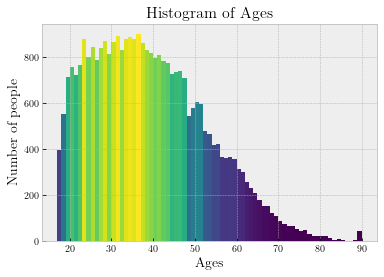

In [5]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Age'], bins=(a['Age'].max() - a['Age'].min()),
          title='Histogram of Ages', xlabel='Ages', ylabel='Number of people')

In [6]:
a["Race"].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [7]:
a["Race"].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [8]:
a["Sex"].value_counts()

Male      21789
Female    10771
Name: Sex, dtype: int64

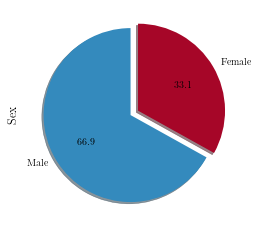

In [9]:
fig, ax = plt.subplots()
a['Sex'].value_counts().plot(kind='pie', autopct='%1.1f',
        shadow=True, startangle=90, ax=ax, explode=[0, 0.1])
#  explode=explode,  labels=labels
plt.show()

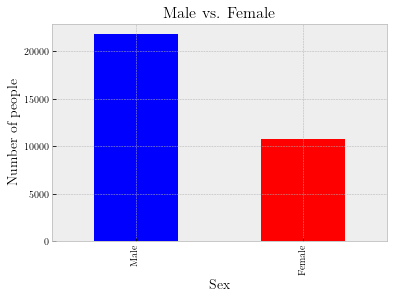

In [10]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Sex'].value_counts(), bins=2,
          title='Male vs. Female', cmap='bwr',
          xlabel='Sex', ylabel='Number of people',
          func=lambda x, xmax: (x/xmax < 1/2), df=True)

#### We can see below that 'Education' and 'Education Number' are actually the same feature.

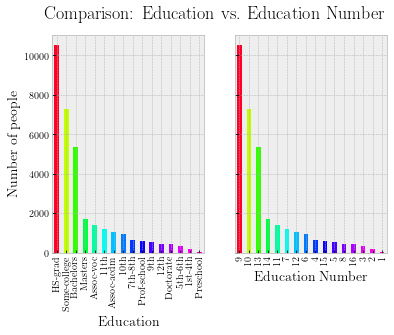

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

cute_hist(ax=ax1, x=a['Education'].value_counts(), title='',
          xlabel='Education', ylabel='Number of people',
          cmap='gist_rainbow', df=True, show=False,
          func=lambda a,b: np.sqrt(np.linspace(0, 1, num=len(a))))

cute_hist(ax=ax2, x=a['Education Number'].value_counts(), title='',
          xlabel='Education Number', ylabel='Number of people',
          cmap='gist_rainbow', df=True, show=False,
          func=lambda a,b: np.sqrt(np.linspace(0, 1, num=len(a))))

fig.suptitle('Comparison: Education vs. Education Number', fontsize=18)
plt.show()

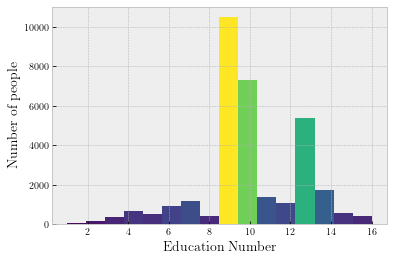

In [12]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Education Number'], title='',
          xlabel='Education Number', ylabel='Number of people',
          cmap='viridis', df=False, show=True, bins=16, func=lambda a,b: (a/b)**(1/1.5))

#### We are going to use `Education Number`, removing the `Education` feature.

In [13]:
a.drop(columns='Education');

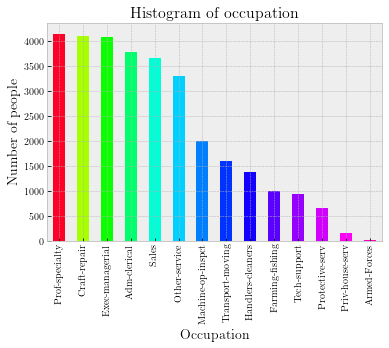

In [14]:
fig, ax = plt.subplots()
cute_hist(ax=ax, x=a['Occupation'].value_counts(), title='Histogram of occupation',
          xlabel='Occupation', ylabel='Number of people',
          cmap='gist_rainbow', df=True,
          func=lambda a,b: np.sqrt(np.linspace(0, 1, num=len(a))))

In [15]:
adult = a.dropna();
adult.shape

(30161, 16)